I will be using NLTK library and use VADER for the sentiment analysis!

In [1]:
!pip install nltk


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [20]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arnoldm./nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:000:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Load comments CSV
comment_df = pd.read_csv("../data/youtube_comment_data_cleaned.csv")

# Initialize Sentiment Analyzer
sid_obj = SentimentIntensityAnalyzer()

# List to store sentiment results
sentiment_results = []

def sentiment_scores():
    """Processes sentiment for each comment and stores results."""
    for _, row in comment_df.iterrows():
        comment_text = str(row["Comment"])  # Ensure text format
        comment_id = row["Index"]
        video_id = row["Id"]

        # Skip empty or NaN comments
        if comment_text.strip().lower() in ["nan", "none", ""]:
            continue

        # Compute sentiment scores
        sentiment_dict = sid_obj.polarity_scores(comment_text)
        compound_score = sentiment_dict["compound"]

        # Determine sentiment label
        if compound_score >= 0.05:
            sentiment_label = "Positive"
        elif compound_score <= -0.05:
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"

        # Append result to list
        sentiment_results.append({
            "Comment_ID": comment_id,
            "Comment": comment_text,
            "Sentiment_Score": compound_score,
            "Sentiment_Label": sentiment_label,
            "Video_Id": video_id
        })


if __name__ == "__main__":
    sentiment_scores()

    sentiment_results_df = pd.DataFrame(sentiment_results)
    sentiment_results_df.to_csv("../data/youtube_comment_sentiment.csv", index=False)

    print("✅ Sentiment analysis complete. Results saved to youtube_comment_sentiment.csv")


✅ Sentiment analysis complete. Results saved to youtube_comment_sentiment.csv


Question 1: What's the average sentiment per video?

In [ ]:
import pandas as pd
from collections import Counter

df = pd.read_csv("../data/youtube_comment_sentiment.csv")

sentiment_counts = df.groupby("Video_Id")["Sentiment_Label"].apply(lambda x: Counter(x).most_common(1)[0][0])

print(sentiment_counts)


Video_Id
-gYpCIbZjUQ    Positive
4OmC6LyO5QI    Positive
FJV7HeHT4q4    Positive
IKot8dQc1Ps    Positive
WEP5ubPMGDU    Positive
dJyz6iK8VXE    Positive
laSK7Pxh0_8    Positive
rhjiANJVR6g    Positive
wqEsTPaUZF0    Positive
yaXm6UsSHBM    Positive
Name: Sentiment_Label, dtype: object


In [36]:
sentiment_average = df.groupby("Video_Id")["Sentiment_Score"].mean()
print(sentiment_average)

Video_Id
-gYpCIbZjUQ    0.075570
4OmC6LyO5QI    0.240436
FJV7HeHT4q4    0.187170
IKot8dQc1Ps    0.164949
WEP5ubPMGDU    0.264401
dJyz6iK8VXE    0.234352
laSK7Pxh0_8    0.245622
rhjiANJVR6g    0.229627
wqEsTPaUZF0    0.166475
yaXm6UsSHBM    0.194000
Name: Sentiment_Score, dtype: float64


In [42]:
df_data = pd.read_csv("../data/youtube_data.csv")

# video_like = df_data.groupby("Video_Id").sentiment_average

# print(video_like)

df_data_2 = pd.DataFrame(data=sentiment_average, columns=[ "Sentiment_Score"])

print(df_data_2)


             Sentiment_Score
Video_Id                    
-gYpCIbZjUQ         0.075570
4OmC6LyO5QI         0.240436
FJV7HeHT4q4         0.187170
IKot8dQc1Ps         0.164949
WEP5ubPMGDU         0.264401
dJyz6iK8VXE         0.234352
laSK7Pxh0_8         0.245622
rhjiANJVR6g         0.229627
wqEsTPaUZF0         0.166475
yaXm6UsSHBM         0.194000


In [44]:
df_data_2.columns

Index(['Sentiment_Score'], dtype='object')

In [50]:
df_data_2 = df_data_2.reset_index()

df_data = pd.read_csv("../data/youtube_data.csv")

df_merged = pd.merge(df_data_2, df_data[["Id", "Likes", "Views"]], left_on="Video_Id", right_on="Id", how="left")


print(df_merged)


   index     Video_Id  Sentiment_Score           Id   Likes     Views
0      0  -gYpCIbZjUQ         0.075570  -gYpCIbZjUQ  115321   4462875
1      1  4OmC6LyO5QI         0.240436  4OmC6LyO5QI   43789   3066337
2      2  FJV7HeHT4q4         0.187170  FJV7HeHT4q4   31554    986425
3      3  IKot8dQc1Ps         0.164949  IKot8dQc1Ps    9820    310861
4      4  WEP5ubPMGDU         0.264401  WEP5ubPMGDU  129480  11120378
5      5  dJyz6iK8VXE         0.234352  dJyz6iK8VXE  226173  10568618
6      6  laSK7Pxh0_8         0.245622  laSK7Pxh0_8  121736   5647156
7      7  rhjiANJVR6g         0.229627  rhjiANJVR6g  122956   6076195
8      8  wqEsTPaUZF0         0.166475  wqEsTPaUZF0  386693  14851789
9      9  yaXm6UsSHBM         0.194000  yaXm6UsSHBM    1639     77516


In [51]:
df_merged = df_merged.drop(columns=["Id"])

In [53]:
df_merged = df_merged.drop(columns=["index"])
print(df_merged)

      Video_Id  Sentiment_Score   Likes     Views
0  -gYpCIbZjUQ         0.075570  115321   4462875
1  4OmC6LyO5QI         0.240436   43789   3066337
2  FJV7HeHT4q4         0.187170   31554    986425
3  IKot8dQc1Ps         0.164949    9820    310861
4  WEP5ubPMGDU         0.264401  129480  11120378
5  dJyz6iK8VXE         0.234352  226173  10568618
6  laSK7Pxh0_8         0.245622  121736   5647156
7  rhjiANJVR6g         0.229627  122956   6076195
8  wqEsTPaUZF0         0.166475  386693  14851789
9  yaXm6UsSHBM         0.194000    1639     77516


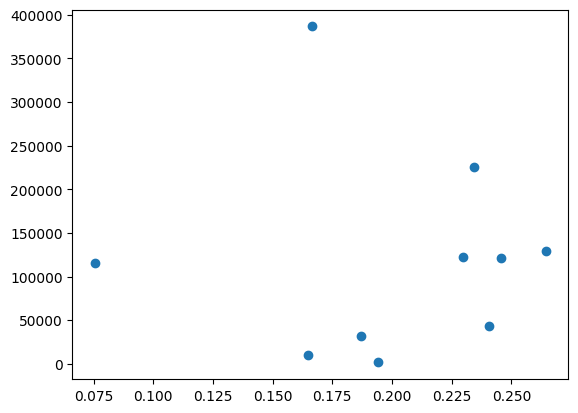

In [59]:
import matplotlib.pyplot as plt
# import numpy as np

x = df_merged["Sentiment_Score"]
y = df_merged["Likes"]


plt.scatter(x, y)
plt.show()

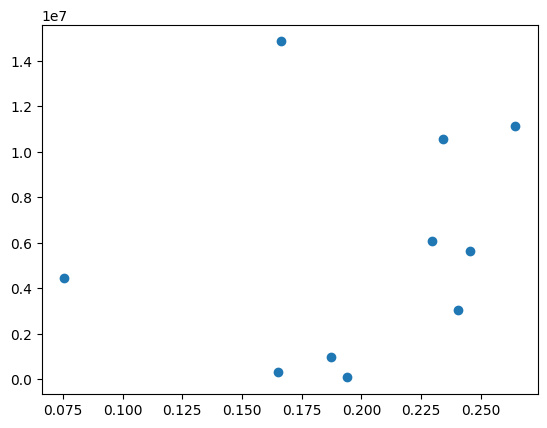

In [61]:
import matplotlib.pyplot as plt
# import numpy as np

q = df_merged["Sentiment_Score"]
p = df_merged["Views"]


plt.scatter(q, p)
plt.show()

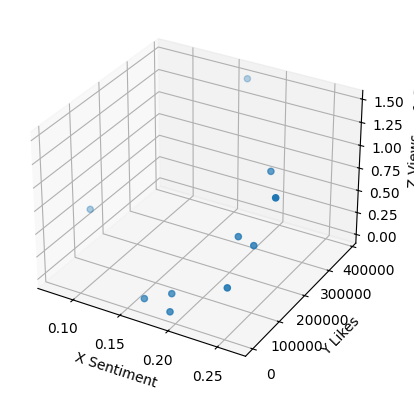

<Figure size 1200x800 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)


fig = plt.figure()

plt.figure(figsize=(12, 8))

ax = fig.add_subplot(projection='3d')

# n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

xs = df_merged["Sentiment_Score"]
ys = df_merged["Likes"]
zs = df_merged["Views"]
ax.scatter(xs, ys, zs)

ax.set_xlabel('X Sentiment')
ax.set_ylabel('Y Likes')
ax.set_zlabel('Z Views')

plt.show()

In [68]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 60.1 kB/s eta 0:00:0031m59.0 kB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


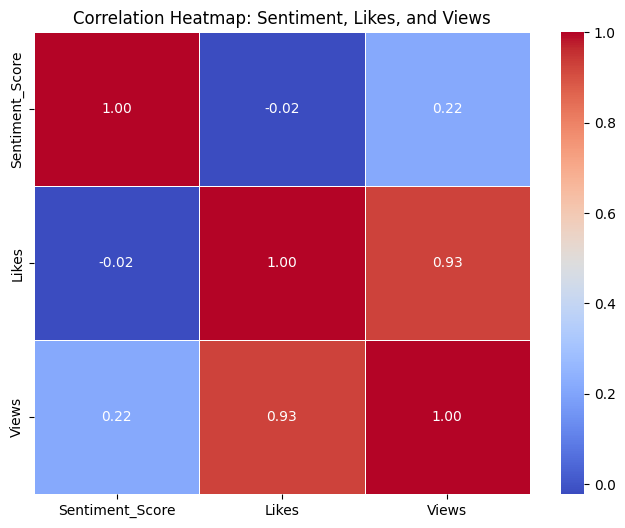

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_merged[["Sentiment_Score", "Likes", "Views"]].corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap: Sentiment, Likes, and Views")
plt.show()


Conclusion: There doesn't seem to be a strong correlation between Sentiment compared to likes or views. Only between views and likes there is a positive correlation.